In [188]:
import numpy as np
import os
from datetime import datetime
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import datasets
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import  Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import set_config
import gc
import warnings
warnings.filterwarnings('ignore')
gc.collect()
set_config(display='diagram')
print('All Packages imported Successfully!!')

All Packages imported Successfully!!


In [132]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [133]:
gpu = tf.config.list_physical_devices('GPU')

print(f'The current tensorflow version {tf.__version__}')
print(f'The current working directory path {os.getcwd()}')

if gpu:
    print(f'GPU Available {gpu}')
else:
    print('No GPU')

The current tensorflow version 2.10.1
The current working directory path C:\Users\sayan\PycharmProjects\Machine Learning
GPU Available [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [134]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [135]:
train_images , test_images = train_images / 255.0 , test_images / 255.0

print(f'The shape of the training images {train_images.shape}')
print(f'The shape of the test images {test_images.shape}')

The shape of the training images (60000, 28, 28)
The shape of the test images (10000, 28, 28)


In [136]:
class_names = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt",
               7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

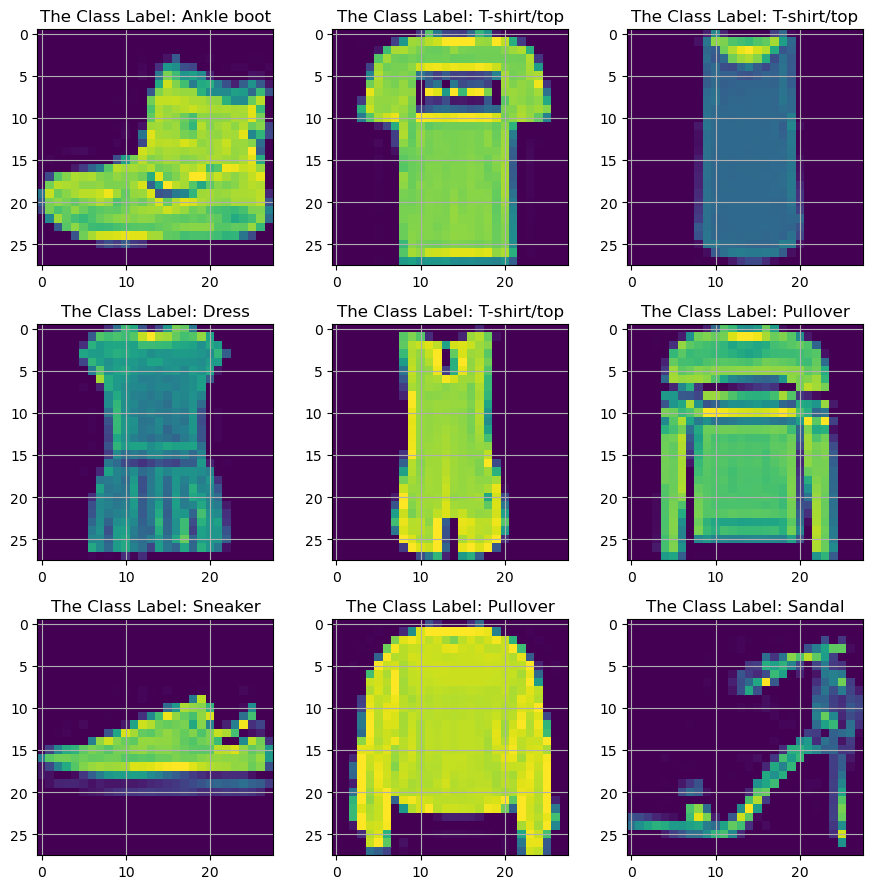

In [137]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9))

for index, ax in enumerate(axs.flatten()):
    image = train_images[index]
    ax.imshow(image)
    ax.set_title(f'The Class Label: {class_names[train_labels[index]]}')
    ax.grid('off')

plt.tight_layout()
plt.show()

In [138]:
model = tf.keras.models.Sequential(
    [
        keras.layers.Conv2D(input_shape=(28, 28, 1), filters=6, activation='elu', kernel_size=(3, 3),
                            kernel_initializer='he_normal'),
        keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
        keras.layers.Conv2D(filters=8, activation='relu', kernel_size=(3, 3), kernel_initializer='he_normal',
                            kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.MaxPool2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=16, activation='tanh', kernel_initializer='glorot_normal',
                           kernel_regularizer=keras.regularizers.l2(0.05)),
        keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal',
                           kernel_regularizer=keras.regularizers.l1(0.01)),
        keras.layers.Dropout(rate=0.4),
        keras.layers.Dense(activation='softmax', units=10)
    ]
)

In [139]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 8)         440       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 16)                3

In [140]:
check_point = ModelCheckpoint(save_best_only=True, save_weights_only=True,
                              filepath=os.path.join(os.getcwd(),'MNIST_Dataset_Classification/', 'fashion_minist/', 'model_checkpoints/'),
                              monitor='val_loss')

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

!rm -rf ./logs/ 'C:/Users/sayan/PycharmProjects/Machine Learning/MNIST_Dataset_Classification/log_dir/'
tensorboard = TensorBoard(log_dir=os.path.join(os.getcwd(), 'MNIST_Dataset_Classification/log_dir', datetime.now().strftime('%Y%m%d-$H%M%S')), histogram_freq=1)

callback_list = [check_point, early_stopping, tensorboard]

In [141]:
history = model.fit(
    x=train_images,
    y=train_labels,
    validation_data=(test_images, test_labels),
    epochs=20,
    verbose=2,
    callbacks=callback_list,
    batch_size=64
)

Epoch 1/20
1875/1875 - 11s - loss: 1.9794 - accuracy: 0.6926 - val_loss: 0.9893 - val_accuracy: 0.7578 - 11s/epoch - 6ms/step
Epoch 2/20
1875/1875 - 9s - loss: 0.9564 - accuracy: 0.7594 - val_loss: 0.8501 - val_accuracy: 0.7765 - 9s/epoch - 5ms/step
Epoch 3/20
1875/1875 - 8s - loss: 0.8664 - accuracy: 0.7732 - val_loss: 0.8248 - val_accuracy: 0.7686 - 8s/epoch - 4ms/step
Epoch 4/20
1875/1875 - 8s - loss: 0.8202 - accuracy: 0.7844 - val_loss: 0.7381 - val_accuracy: 0.8106 - 8s/epoch - 4ms/step
Epoch 5/20
1875/1875 - 8s - loss: 0.7802 - accuracy: 0.7979 - val_loss: 0.7270 - val_accuracy: 0.8027 - 8s/epoch - 4ms/step
Epoch 6/20
1875/1875 - 8s - loss: 0.7542 - accuracy: 0.8077 - val_loss: 0.7120 - val_accuracy: 0.8194 - 8s/epoch - 4ms/step
Epoch 7/20
1875/1875 - 8s - loss: 0.7376 - accuracy: 0.8115 - val_loss: 0.6813 - val_accuracy: 0.8215 - 8s/epoch - 4ms/step
Epoch 8/20
1875/1875 - 8s - loss: 0.7237 - accuracy: 0.8162 - val_loss: 0.6731 - val_accuracy: 0.8251 - 8s/epoch - 4ms/step
Epoch 

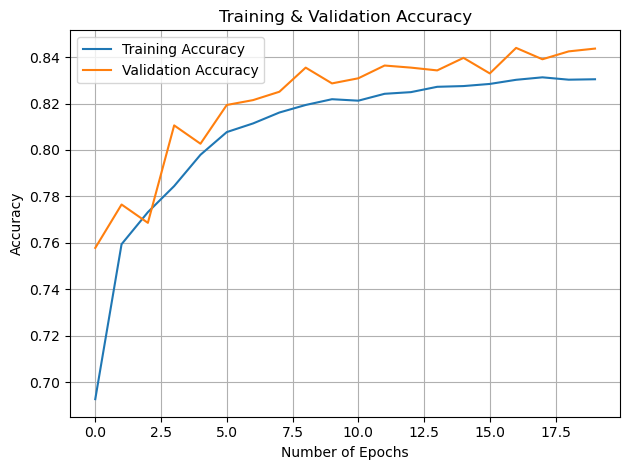

In [142]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.grid('on')
plt.legend()
plt.tight_layout()
plt.show()

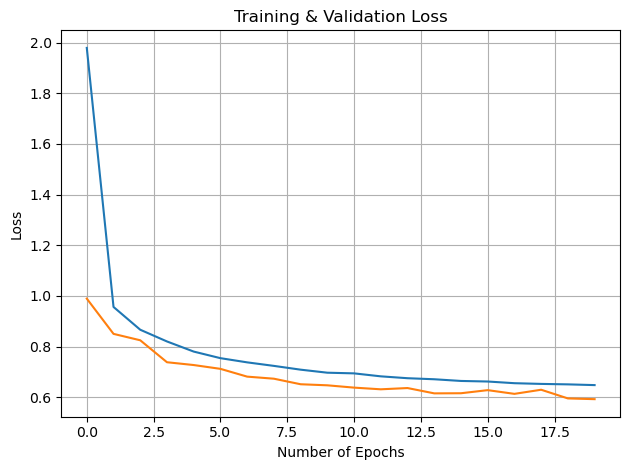

In [143]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.grid('on')
plt.tight_layout()
plt.show()

In [156]:
model_NN_df = pd.DataFrame(data=history.history)
display(model_NN_df)

,loss,accuracy,val_loss,val_accuracy
0,1.979356,0.692617,0.989283,0.7578
1,0.956412,0.759400,0.850132,0.7765
2,0.866441,0.773200,0.824795,0.7686
3,0.820154,0.784450,0.738101,0.8106
4,0.780202,0.797933,0.727043,0.8027
5,0.754183,0.807717,0.711985,0.8194
6,0.737620,0.811450,0.681266,0.8215
7,0.723705,0.816150,0.673107,0.8251
8,0.708764,0.819400,0.651180,0.8355
9,0.696779,0.821883,0.646995,0.8287


In [174]:
train_images_conv , test_images_conv = train_images.reshape((train_images.shape[0]),-1) , test_images.reshape((test_images.shape[0]),-1)

print(f'The shape of the Training Image for Conventional Model {train_images_conv.shape}')
print(f'The shape of the Test Image for Conventional Model {test_images_conv.shape}')

The shape of the Training Image for Conventional Model (60000, 784)
The shape of the Test Image for Conventional Model (10000, 784)


In [181]:
# Defining the preprocessor
preprocessor = Pipeline(
    steps=[
        ('standardization', StandardScaler(with_std=False)),
    ]
)

# Defining the possible models and parameters
parameter_grid = [
    {
        'model': [SVC()],
        'model__C' : [0.2,0.5,1.0],
        'model__kernel' : ['linear', 'poly', 'rbf']
    },

    {
        'model' : [DecisionTreeClassifier()],
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [3, 5, 10, None]
    },

    {
        'model' : [RandomForestClassifier()],
        'model__n_estimators' : [100,1000,500],
        'model__criterion': ['gini', 'entropy']
    },

    {
        'model' : [XGBClassifier()],
        'model__n_estimators' : [100,1000,500],
        'model__max_depth' : [3,5,10],
        'model__learning_rate' : [0.001,0.01,0.05]
    }
]

# Create pipeline
pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(multi_class='multinomial'))
    ]
)

pipe

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('standardization',
                                  StandardScaler(with_std=False))])),
                ('model', LogisticRegression(multi_class='multinomial'))])

In [182]:
random_search_cv = RandomizedSearchCV(estimator=pipe, param_distributions=parameter_grid, cv=5, verbose=1, scoring='accuracy', random_state=42)

In [183]:
random_search_cv.fit(
 X = train_images_conv,
 y = train_labels
)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              Pipeline(steps=[('standardization',
                                                               StandardScaler(with_std=False))])),
                                             ('model',
                                              LogisticRegression(multi_class='multinomial'))]),
                   param_distributions=[{'model': [SVC()],
                                         'model__C': [0.2, 0.5, 1.0],
                                         'model__kernel': ['linear', 'poly',
                                                           'rbf']},
                                        {'model': [DecisionTreeClassifier()],
                                         'model__criterio...
                                                                 max_delta_step=None,
                                                                 max_depth=10,
                                                                 max_leaves=None,
                                                                 min_child_weight=None,
                                                                 missing=nan,
                                                                 monotone_constraints=None,
                                                                 n_estimators=1000,
                                                                 n_jobs=None,
                                                                 num_parallel_tree=None,
                                                                 predictor=None,
                                                                 random_state=None, ...)],
                                         'model__learning_rate': [0.001, 0.01,
                                                                  0.05],
                                         'model__max_depth': [3, 5, 10],
                                         'model__n_estimators': [100, 1000,
                                                                 500]}],
                   random_state=42, scoring='accuracy', verbose=1)

In [184]:
random_search_results = pd.DataFrame(random_search_cv.cv_results_)

display(random_search_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__criterion,param_model,param_model__n_estimators,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.424475,0.776952,0.067109,0.003802,3,entropy,DecisionTreeClassifier(),NaN,NaN,"{'model__max_depth': 3, 'model__criterion': 'e...",0.515417,0.514583,0.515167,0.516417,0.513750,0.515067,0.000886,10
1,3252.008844,20.043484,0.999256,0.041774,10,NaN,"XGBClassifier(base_score=None, booster=None, c...",1000,0.01,"{'model__n_estimators': 1000, 'model__max_dept...",0.899083,0.895750,0.903667,0.902833,0.896333,0.899533,0.003247,3
2,3435.481650,12.390552,1.197913,0.066272,10,NaN,"XGBClassifier(base_score=None, booster=None, c...",1000,0.001,"{'model__n_estimators': 1000, 'model__max_dept...",0.874000,0.869167,0.875333,0.875000,0.870917,0.872883,0.002425,6
3,1437.684096,2.859250,0.525975,0.006785,5,NaN,"XGBClassifier(base_score=None, booster=None, c...",1000,0.05,"{'model__n_estimators': 1000, 'model__max_dept...",0.909167,0.904583,0.906333,0.908833,0.906417,0.907067,0.001712,2
4,72.657799,0.382502,0.478993,0.007741,NaN,gini,RandomForestClassifier(),100,NaN,"{'model__n_estimators': 100, 'model__criterion...",0.884917,0.876000,0.883417,0.886250,0.881667,0.882450,0.003569,5
5,2518.190331,7.267274,0.743707,0.006982,10,NaN,"XGBClassifier(base_score=None, booster=None, c...",1000,0.05,"{'model__n_estimators': 1000, 'model__max_dept...",0.909000,0.904083,0.909417,0.911583,0.906167,0.908050,0.002628,1
6,148.856479,0.681432,0.134617,0.009867,5,NaN,"XGBClassifier(base_score=None, booster=None, c...",100,0.001,"{'model__n_estimators': 100, 'model__max_depth...",0.813583,0.804333,0.815417,0.812500,0.811083,0.811383,0.003799,7
7,422.042199,1.413180,0.187724,0.005347,3,NaN,"XGBClassifier(base_score=None, booster=None, c...",500,0.001,"{'model__n_estimators': 500, 'model__max_depth...",0.781667,0.780000,0.782083,0.784583,0.774167,0.780500,0.003490,9
8,85.104908,0.458200,0.113015,0.009532,3,NaN,"XGBClassifier(base_score=None, booster=None, c...",100,0.01,"{'model__n_estimators': 100, 'model__max_depth...",0.796583,0.792000,0.794667,0.798333,0.792417,0.794800,0.002417,8
9,356.993998,0.947354,2.137795,0.032736,NaN,gini,RandomForestClassifier(),500,NaN,"{'model__n_estimators': 500, 'model__criterion...",0.886333,0.877833,0.887667,0.887333,0.883500,0.884533,0.003657,4


In [185]:
display(random_search_results[['param_model','mean_fit_time','mean_test_score']].sort_values('mean_test_score',ascending=False))

,param_model,mean_fit_time,mean_test_score
5,"XGBClassifier(base_score=None, booster=None, c...",2518.190331,0.908050
3,"XGBClassifier(base_score=None, booster=None, c...",1437.684096,0.907067
1,"XGBClassifier(base_score=None, booster=None, c...",3252.008844,0.899533
9,RandomForestClassifier(),356.993998,0.884533
4,RandomForestClassifier(),72.657799,0.882450
2,"XGBClassifier(base_score=None, booster=None, c...",3435.481650,0.872883
6,"XGBClassifier(base_score=None, booster=None, c...",148.856479,0.811383
8,"XGBClassifier(base_score=None, booster=None, c...",85.104908,0.794800
7,"XGBClassifier(base_score=None, booster=None, c...",422.042199,0.780500
0,DecisionTreeClassifier(),5.424475,0.515067


In [186]:
print('The best estimator / model {}'.format(random_search_cv.best_estimator_))
print('\n\nThe best parameter {}'.format(random_search_cv.best_params_))
print('\n\nThe best score {}'.format(random_search_cv.best_score_))

The best estimator / model Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('standardization',
                                  StandardScaler(with_std=False))])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
            

In [208]:
test_images_conv_predictLabels = random_search_cv.predict(test_images_conv)

In [214]:
print(f'The shape of the Predicted Test Images using the Best Model is {test_images_conv_predictLabels.shape}')

In [218]:
print(classification_report(y_true=test_labels ,y_pred = test_images_conv_predictLabels))